# Customer data base analytics

In this note book I work with an open-source data set to prevent personal data disclosure. 

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import base64

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [3]:
#importig the dataset
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#Check the dataset information: null data, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
#check if there are any duplicates
df[df.duplicated()==True]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


In [7]:
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

As we can see there is no Null data, the data-set is clean and has no duplicates.
Also the information shows only the latest purchases of the customers, so we cannot make deep analysis of the customers' behavior.

However, there is some information that we can use as categories: 
* Size
* Category
* Season
* Subscription status
* Payment Method
* Shipping type
* Discount Applied
* Promo Code Used
* Preferred Payment Method
* Frequency of Purchases

These information may help us find some correlation to understand  what can increase our revenue. 
But firstly we should analyze the data about our customers to build business strategy.


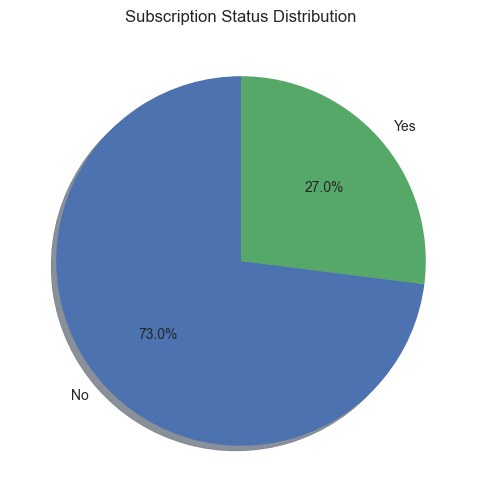

In [88]:
subs = df.pivot_table(index='Subscription Status', values='Customer ID', aggfunc='count')

# Extract the counts and labels
counts = subs['Customer ID']
labels = subs.index


# Create the pie plot
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Subscription Status Distribution')
plt.show()

As per chart it is seen that the majority of the customers are not subscribed which means that they do not have up to date information about our stock and the company can perform better in case they subscribe.

Let's check what data correlates with the Subscription Status:

In [9]:
#Copy dataFrame before conversion of categorial data
data = df.copy()

In [10]:
data['Subscription Status_coded'] = data['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Gender_coded'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
data['Promo Code Used_coded'] = data['Promo Code Used'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Discount Applied_coded'] = data['Discount Applied'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Size_coded'] = labelencoder.fit_transform(data['Size'].values)
data['Season_coded'] = labelencoder.fit_transform(data['Season'].values)
data['Category_coded'] = labelencoder.fit_transform(data['Category'].values)
data['Frequency_coded'] = labelencoder.fit_transform(data['Frequency of Purchases'].values)
data['Payment Method_coded'] = labelencoder.fit_transform(data['Payment Method'].values)
data['Shipping Type_coded'] = labelencoder.fit_transform(data['Shipping Type'].values)
data['Preferred Payment Method_coded'] = labelencoder.fit_transform(data['Preferred Payment Method'].values)


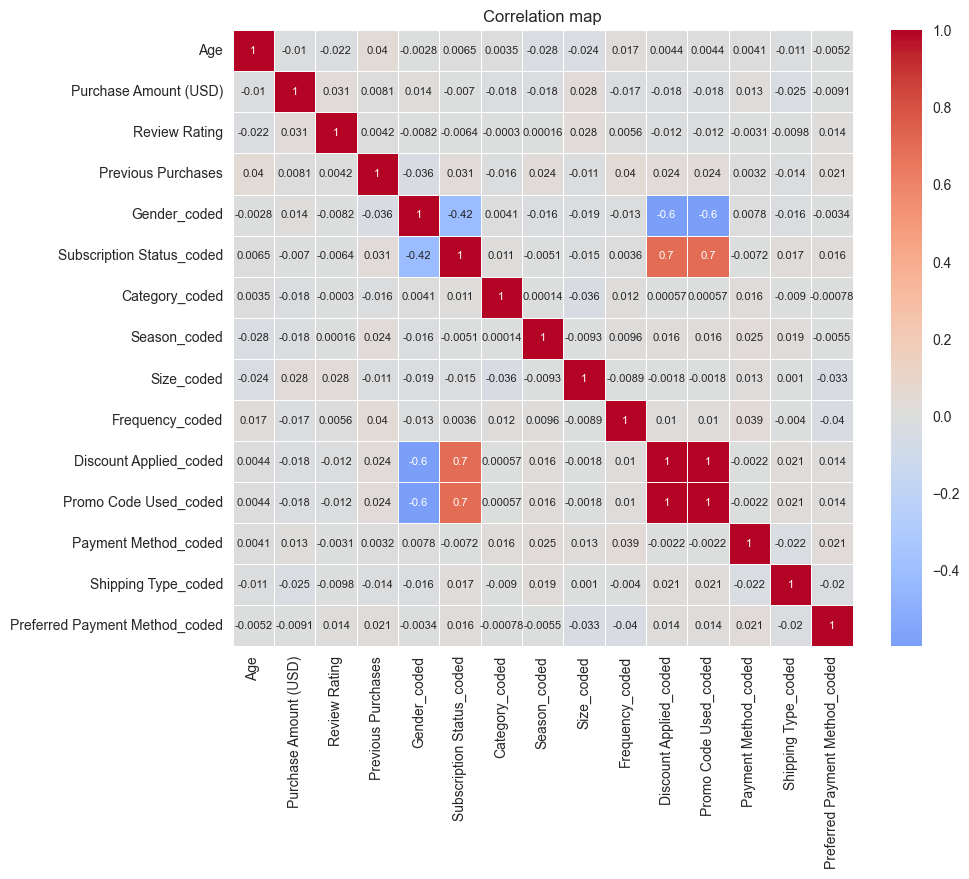

In [12]:
correlation_matrix = data[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
                           'Gender_coded', 'Subscription Status_coded', 'Category_coded',
                           'Season_coded', 'Size_coded', 'Frequency_coded', 'Discount Applied_coded', 'Promo Code Used_coded', 'Payment Method_coded', 'Shipping Type_coded', 'Preferred Payment Method_coded' ]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidth=.5, annot_kws={"size": 8})

plt.title('Correlation map')
plt.show()

As we can see, the Subscription status is correlated to Gender, Applied discount and Promocode usage.
At the first glance we may assume that people get the subscription to get a discount promo code.

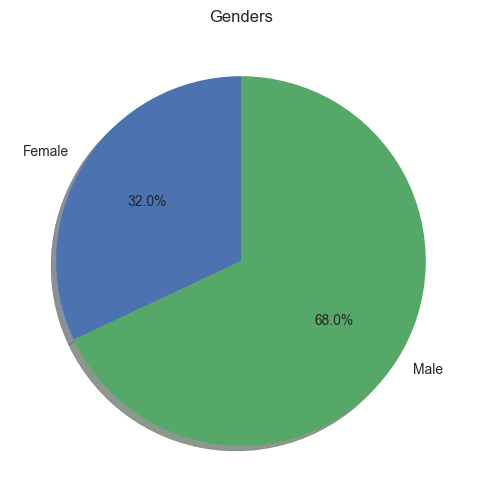

In [90]:
gender = df.pivot_table(index = 'Gender', values = 'Customer ID', aggfunc = 'count')

counts = gender['Customer ID']
labels = gender.index


# Create the pie plot
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Genders')
plt.show()

In [14]:
subs = df.pivot_table(index = 'Gender', columns = 'Subscription Status', values = 'Customer ID', aggfunc = 'count' )

In [15]:
subs_reset = subs.reset_index()
subs_long = pd.melt(subs_reset, id_vars=['Gender'], value_vars=['No', 'Yes'], 
                    var_name='Subscription Status', value_name='Count')

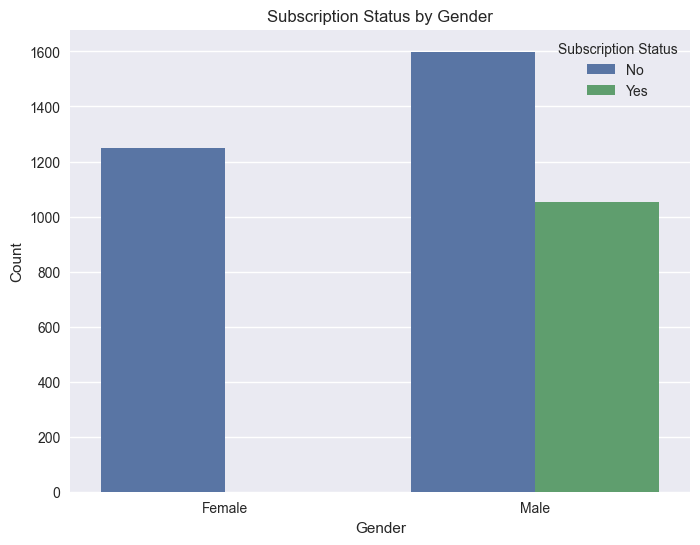

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Count', hue='Subscription Status', data=subs_long)
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()

The data shows that only Male customers have subscription.
Maybe there is some differences in these categories, let's see the age of the groups.

In [17]:
age = df.pivot_table(index = 'Age', columns = 'Gender', values = 'Customer ID', aggfunc = 'count' )

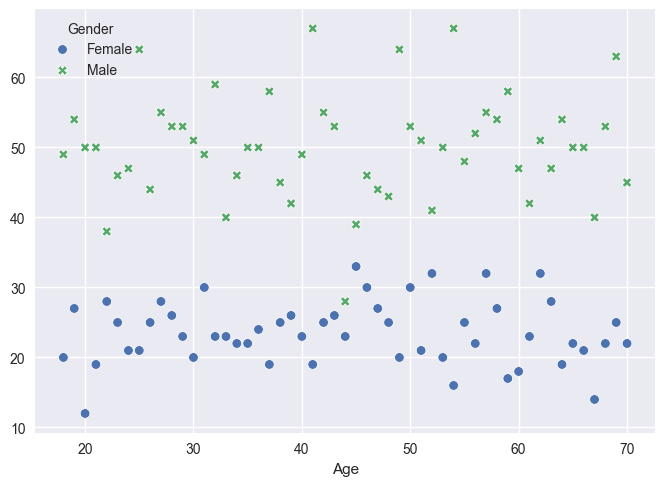

In [92]:
age_fig = sns.scatterplot(age[['Female', 'Male']])
plt.show()

In [20]:
discount = df.pivot_table(index = 'Gender', columns = 'Discount Applied', values = 'Customer ID', aggfunc = 'count' )

In [24]:
discount = discount.fillna(0)

In [72]:
disc_new

,Gender,Discount Applied,Count
0,Female,No,1248.0
1,Male,No,975.0
2,Female,Yes,0.0
3,Male,Yes,1677.0


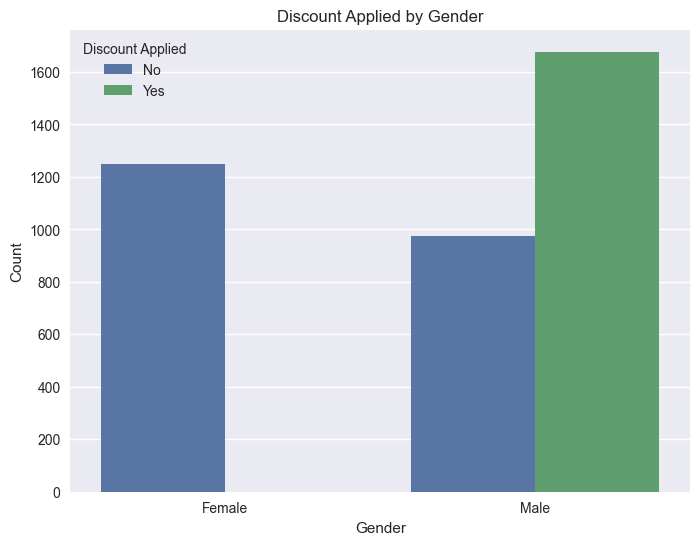

In [74]:
disc_reset = discount.reset_index()
disc_new = pd.melt(disc_reset, id_vars=['Gender'], value_vars=['No', 'Yes'], 
                    var_name='Discount Applied', value_name='Count')


plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Count', hue='Discount Applied', data=disc_new)
plt.title('Discount Applied by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Discount Applied')
plt.show()

As we can see the majority of Male customers apply discount while Women do not use this option. 

In [40]:
disc = df.pivot_table(index = 'Discount Applied', columns =['Subscription Status', 'Promo Code Used'], 
                      values = 'Customer ID', aggfunc = 'count')

In [43]:
disc = disc.fillna(0)

In [44]:
disc

Subscription Status      No            Yes
Promo Code Used          No    Yes     Yes
Discount Applied                          
No                   2223.0    0.0     0.0
Yes                     0.0  624.0  1053.0

In [16]:
age.mean()

Gender
Female    23.547170
Male      50.037736
dtype: float64

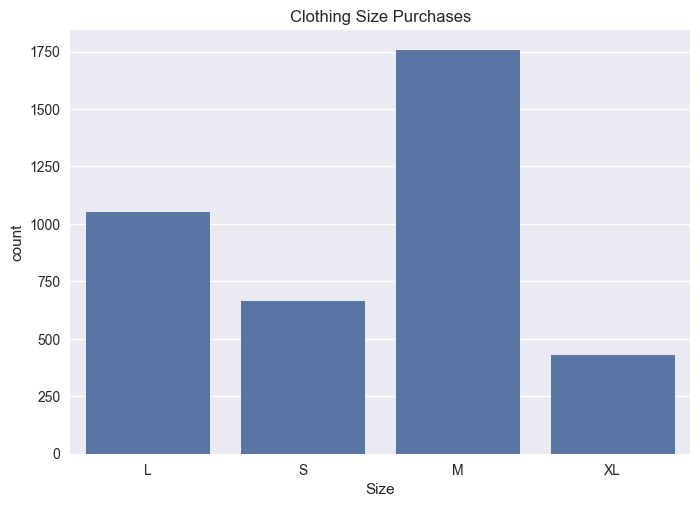

In [66]:
sns.countplot(df, x = 'Size')
plt.title('Clothing Size Purchases')
plt.show()

**Customers data conclusion:** 
1. There is a strong disbalance in Customer Gender and Subscription Status.
2. Women are much younger than men.
3. The data shows that all the discounts are applied using Promo Codes.

**Suggestions:**
1.  Taking this information into account and the fact that Women are the minority of the customers and do not use Promo Codes we can suggest widen clothing collections and start a Promo Campaign with Discount codes for newly subscribed customers.

2. The plot shows that the majority of the customers orders M-sized clothing, which means that we need have more of this size in stock and also check if there is shortage of other sizes that may lead to fewer orders.

## Orders analysis

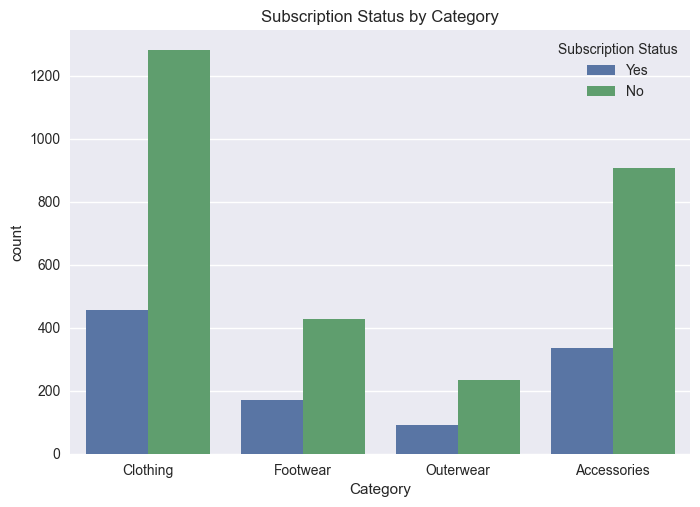

In [65]:
sns.countplot(x='Category', hue='Subscription Status', data=df)
plt.title('Subscription Status by Category')
plt.show()

We see that the majority of Subscribed Customers prefer Clothing and Accessorizes, however it correlates to common Category distribution.

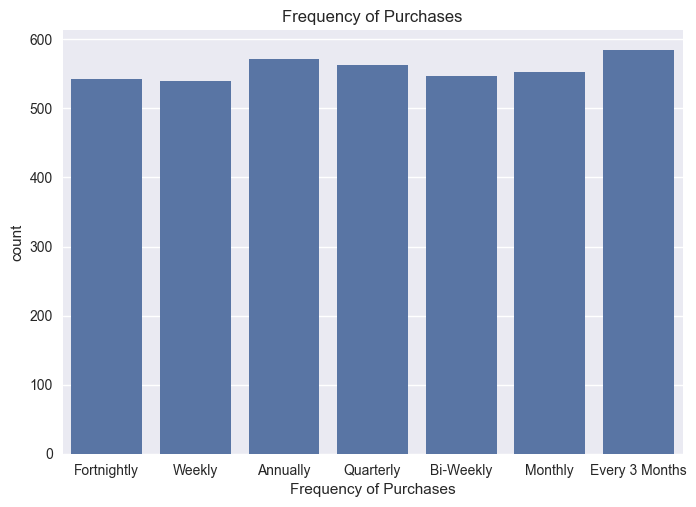

In [67]:
sns.countplot(df, x = 'Frequency of Purchases')
plt.title('Frequency of Purchases')
plt.show()

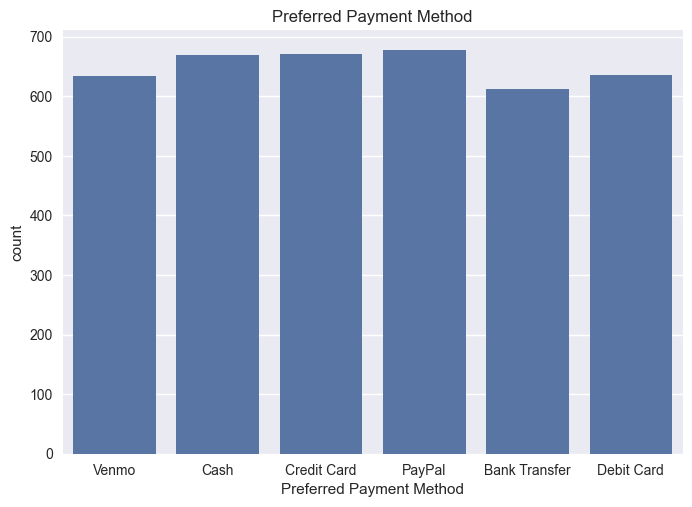

In [68]:
sns.countplot(df, x = 'Preferred Payment Method')
plt.title('Preferred Payment Method')
plt.show()

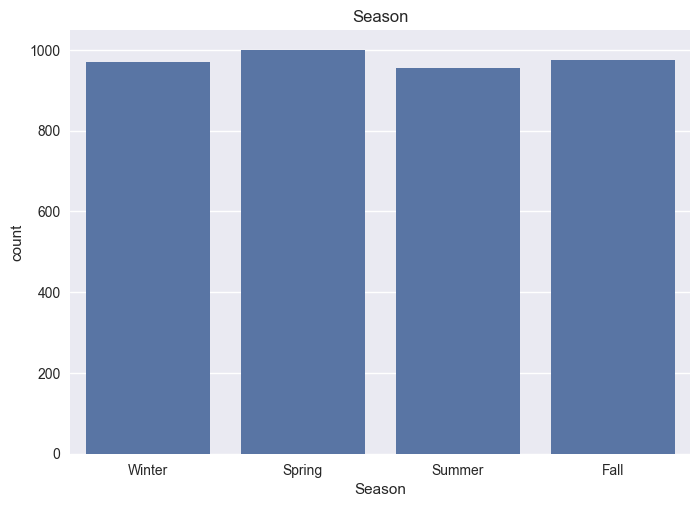

In [69]:
sns.countplot(df, x = 'Season')
plt.title('Season')
plt.show()

**Purchases analytics:** <br/>
The data shows that there is neither strong frequency nor payment method preferences.<br/>
As we previously checked there is not correlation between Frequency / Season and other factors.   

## Conclusion

* As per analysis we can say that marketing should take actions on attracting females, including emission Promo Codes. As now we see that only Subscribed Customers have any Discount, initial Promo Code can increase number of Subscribed customers. <br/>
* There is need to work with the Female audience to increase the number of orders and encourage further Subscription <br/>
* However, we need to keep loyalty of the Subscribed Customers by having in stock the most popular sizes and other marketing strategies. <br/>
* The shopping behavior looks even as there is no imbalance in seasons or Frequency of Purchase.